In [1]:
from mpl_toolkits.mplot3d import Axes3D #import the class for 3d plotting
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams["animation.ffmpeg_path"]="~/srv/app/venv/lib/python3.6/site-packages/ffmpeg/" #not working

In [2]:
from matplotlib.animation import FuncAnimation
from IPython.display import display,Markdown

def update(n,ax):
    ax.azim = 2*np.pi*n/300

%matplotlib agg
N=10
x = np.linspace(-2,2,N)
x, y, z = np.meshgrid(x,x,x) #create 3d grid for x,y,z values
x.shape
rplus = np.sqrt(x**2 + y**2 + (z-1)**2)
rminus = np.sqrt(x**2 + y**2 + (z+1)**2)
E = np.array([x,y,z-1])/rplus**2.5 - np.array([x,y,z+1])/rminus**2.5
for i in range(N**3):
    i1 = i // N**2
    i2 = (i//N) % N
    i3 = i % N
    Eabs = np.sum(E[:,i1,i2,i3]**2)**.5
    if Eabs > 4/N:
        E[:,i1,i2,i3] /= Eabs*N/4
fig = plt.figure(figsize=(8,8)) #create figure object on which the plot will be renderred
ax = Axes3D(fig) #create Axes3D object to display the plot
ax.quiver(x, y, z, *E, color="k", alpha = 0.5)
N=100
x = np.linspace(-2,2,N)
x, y, z = np.meshgrid(x,x,x) #create 3d grid for x,y,z values
x.shape
rplus = np.sqrt(x**2 + y**2 + (z-1)**2)
rminus = np.sqrt(x**2 + y**2 + (z+1)**2)
V = 1/rplus - 1/rminus
contours = [-1, -.3, 0, .3, 1]
halfwidth = 0.005
ranges = [(c-halfwidth, c+halfwidth) for c in contours]
for lower,upper in ranges:
    surface = (V <= upper) & (V > lower)
    ax.plot_trisurf(x[surface], y[surface], z[surface], alpha=0.2)
    
anim = FuncAnimation(fig, update, 300, fargs=(ax,))
Markdown(anim.to_html5_video())

RuntimeError: Requested MovieWriter (ffmpeg) not available

<IPython.core.display.Javascript object>


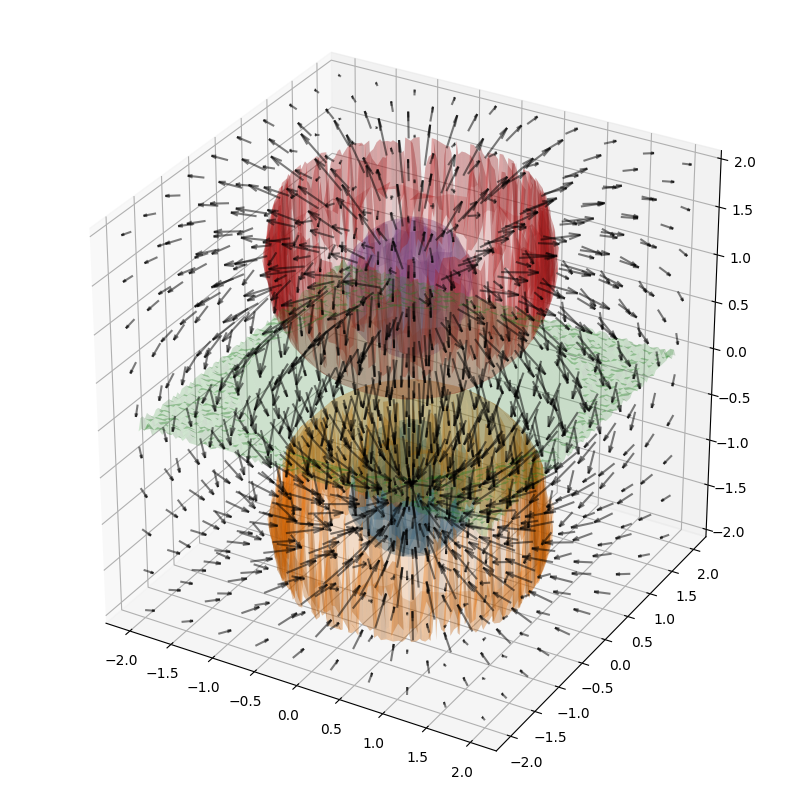

In [3]:
%matplotlib notebook
#set the plots to display interactively (useful for 3d plotting, you can rotate the view by dragging)

N=10
x = np.linspace(-2,2,N)
x, y, z = np.meshgrid(x,x,x) #create 3d grid for x,y,z values
x.shape
rplus = np.sqrt(x**2 + y**2 + (z-1)**2)
rminus = np.sqrt(x**2 + y**2 + (z+1)**2)
E = np.array([x,y,z-1])/rplus**2.5 - np.array([x,y,z+1])/rminus**2.5
for i in range(N**3):
    i1 = i // N**2
    i2 = (i//N) % N
    i3 = i % N
    Eabs = np.sum(E[:,i1,i2,i3]**2)**.5
    if Eabs > 4/N:
        E[:,i1,i2,i3] /= Eabs*N/4
fig = plt.figure(figsize=(8,8)) #create figure object on which the plot will be renderred
ax = Axes3D(fig) #create Axes3D object to display the plot
ax.quiver(x, y, z, *E, color="k", alpha = 0.5)
N=100
x = np.linspace(-2,2,N)
x, y, z = np.meshgrid(x,x,x) #create 3d grid for x,y,z values
x.shape
rplus = np.sqrt(x**2 + y**2 + (z-1)**2)
rminus = np.sqrt(x**2 + y**2 + (z+1)**2)
V = 1/rplus - 1/rminus
contours = [-1, -.3, 0, .3, 1]
halfwidth = 0.005
ranges = [(c-halfwidth, c+halfwidth) for c in contours]
for lower,upper in ranges:
    surface = (V <= upper) & (V > lower)
    ax.plot_trisurf(x[surface], y[surface], z[surface], alpha=0.2)